<a href="https://colab.research.google.com/github/bivekpok/DSPS_BPokhrel/blob/main/labs/lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
from matplotlib import pylab as pl
import numpy as np
from sklearn.linear_model import LinearRegression


In [41]:
grbAG = pd.read_csv('https://raw.githubusercontent.com/fedhere/DSPS_FBianco/main/data/grb050525A.csv')

In [42]:
grbAG.head()

,filter,time,mag,magerr,upperlimit
0,V,66,13.21,0.24,0
1,V,67,12.90,0.23,0
2,V,68,12.86,0.23,0
3,V,69,13.01,0.23,0
4,V,70,12.97,0.23,0


In [43]:
grbAG.tail()

,filter,time,mag,magerr,upperlimit
114,W1,63738,21.20,NaN,1
115,M2,74798,21.59,NaN,1
116,U,128928,20.05,NaN,1
117,V,971360,22.09,NaN,1
118,V,1171176,21.16,NaN,1


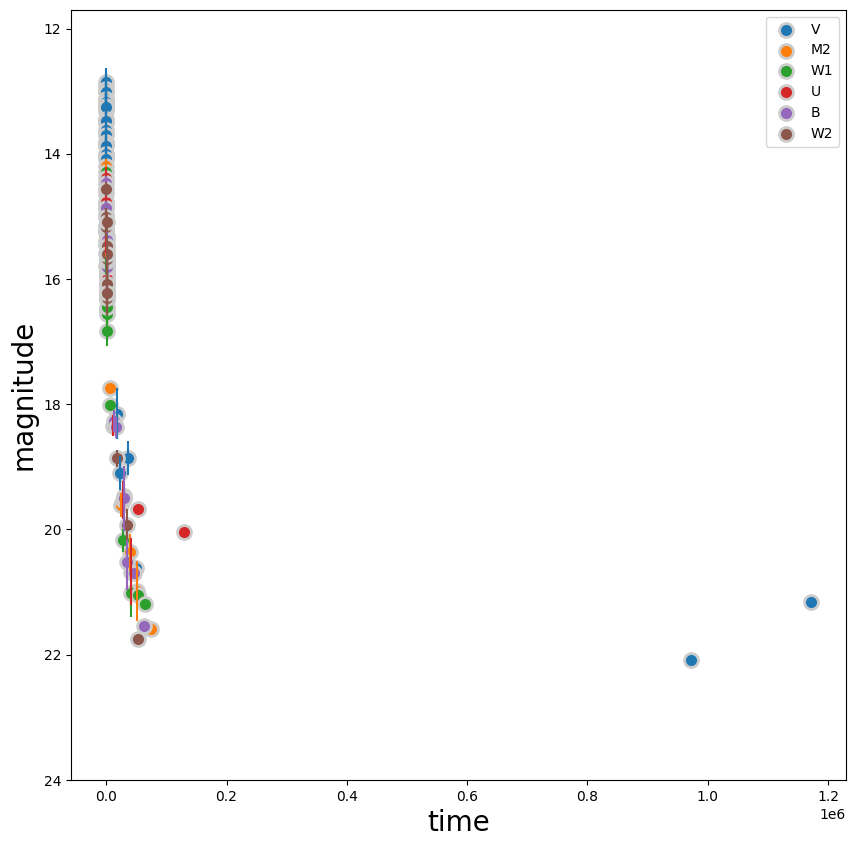

In [44]:
#create a figure container and an axis object inside of it
ax = pl.figure(figsize=(10,10)).add_subplot(111)

#loop on every filter to plot - this will give differnt colors naturally.
#Use pl.errorbar to plot the uncertainties

for f in grbAG["filter"].unique():
    pl.errorbar(grbAG.loc[grbAG["filter"] == f, "time"],
                grbAG.loc[grbAG["filter"] == f, "mag"],
                yerr=grbAG.loc[grbAG["filter"] == f, "magerr"],
                fmt='.', ms=0,
                fcolor=None, label=None)

# replot to add a better marker (optional)
for f in grbAG["filter"].unique():
    pl.scatter(grbAG.loc[grbAG["filter"] == f, "time"],
               grbAG.loc[grbAG["filter"] == f, "mag"],
               alpha=1, s=100, linewidth=2,
               label=f,
               edgecolor='#cccccc')


# plot the upperlimits as arrows
nuplim = grbAG.mag.isna().sum()
for i in grbAG[grbAG.upperlimit == 1].index:
    pl.arrow(grbAG.loc[i].time,
             grbAG.loc[i].magerr, 0, 2,
            head_width=0.05, head_length=0.1, ec='k')

# I am going to invert the y axis because the "magnitude" measurement is an inverse scale: brighter is smaller
pl.ylim(24,11.7)
pl.legend()

#Always rememebr you axis labels!!
pl.ylabel("magnitude", fontsize=20)
pl.xlabel("time", fontsize=20);

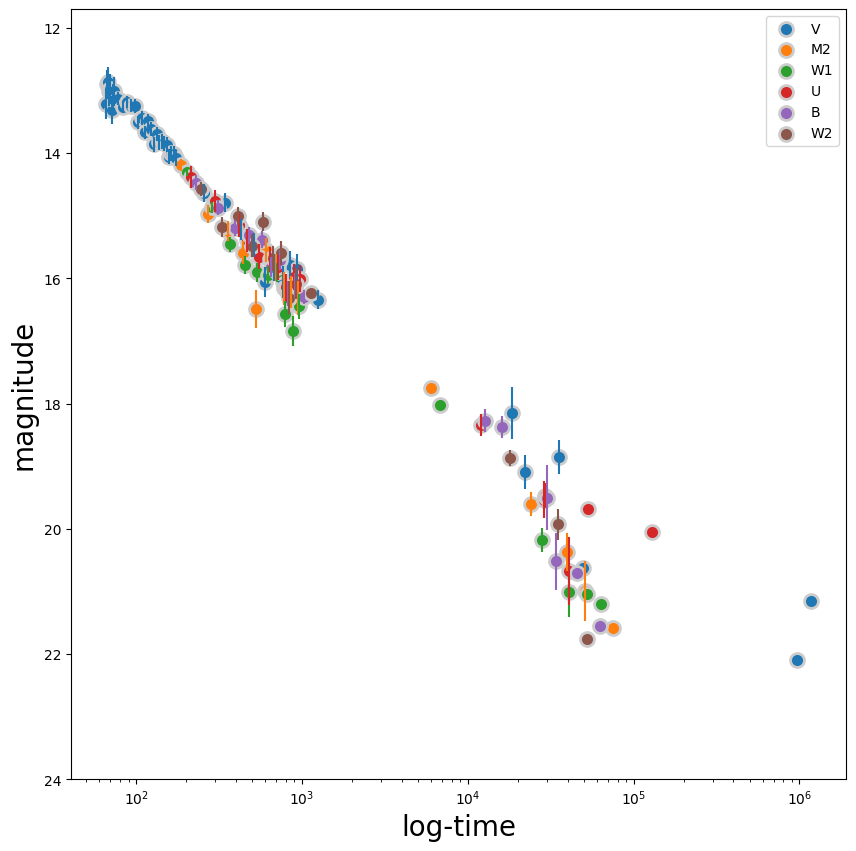

In [45]:
#create a figure container and an axis object inside of it
ax = pl.figure(figsize=(10,10)).add_subplot(111)

#loop on every filter to plot - this will give differnt colors naturally.
#Use pl.errorbar to plot the uncertainties

for f in grbAG["filter"].unique():
    pl.errorbar(grbAG.loc[grbAG["filter"] == f, "time"],
                grbAG.loc[grbAG["filter"] == f, "mag"],
                yerr=grbAG.loc[grbAG["filter"] == f, "magerr"],
                fmt='.', ms=0,
                fcolor=None, label=None)

# replot to add a better marker (optional)
for f in grbAG["filter"].unique():
    pl.scatter(grbAG.loc[grbAG["filter"] == f, "time"],
               grbAG.loc[grbAG["filter"] == f, "mag"],
               alpha=1, s=100, linewidth=2,
               label=f,
               edgecolor='#cccccc')


# plot the upperlimits as arrows
nuplim = grbAG.mag.isna().sum()
for i in grbAG[grbAG.upperlimit == 1].index:
    pl.arrow(grbAG.loc[i].time,
             grbAG.loc[i].magerr, 0, 2,
            head_width=0.05, head_length=0.1, ec='k')

# I am going to invert the y axis because the "magnitude" measurement is an inverse scale: brighter is smaller
pl.ylim(24,11.7)
pl.legend()

#Always rememebr you axis labels!!
pl.ylabel("magnitude", fontsize=20)
pl.xlabel("log-time", fontsize=20)
pl.xscale('log')

In [46]:
grbAG = grbAG[grbAG.upperlimit == 0]
grbAG['logtime'] = np.log10(grbAG['time'])
grbAG

<ipython-input-46-af88d76f8663>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grbAG['logtime'] = np.log10(grbAG['time'])


,filter,time,mag,magerr,upperlimit,logtime
0,V,66,13.210000,0.24,0,1.819544
1,V,67,12.900000,0.23,0,1.826075
2,V,68,12.860000,0.23,0,1.832509
3,V,69,13.010000,0.23,0,1.838849
4,V,70,12.970000,0.23,0,1.845098
...,...,...,...,...,...,...
103,V,35638,18.860000,0.27,0,4.551913
104,M2,39683,20.369034,0.30,0,4.598604
105,W1,40585,21.017147,0.39,0,4.608366
106,U,41040,20.674538,0.54,0,4.613207


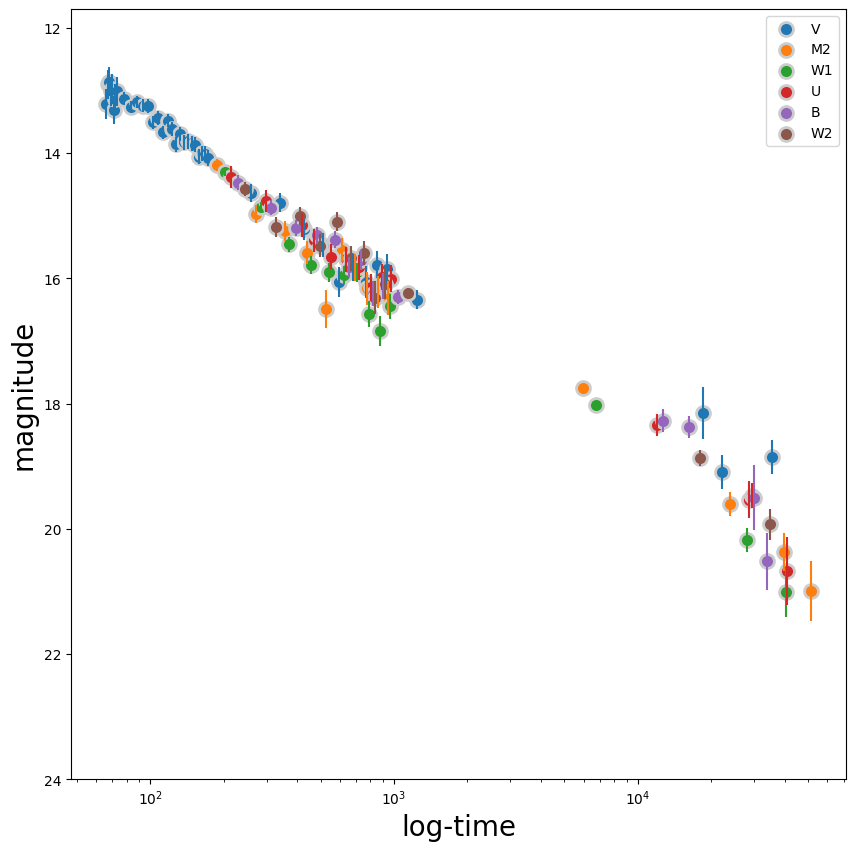

In [9]:
#create a figure container and an axis object inside of it
ax = pl.figure(figsize=(10,10)).add_subplot(111)

#loop on every filter to plot - this will give differnt colors naturally.
#Use pl.errorbar to plot the uncertainties

for f in grbAG["filter"].unique():
    pl.errorbar(grbAG.loc[grbAG["filter"] == f, "time"],
                grbAG.loc[grbAG["filter"] == f, "mag"],
                yerr=grbAG.loc[grbAG["filter"] == f, "magerr"],
                fmt='.', ms=0,
                fcolor=None, label=None)

# replot to add a better marker (optional)
for f in grbAG["filter"].unique():
    pl.scatter(grbAG.loc[grbAG["filter"] == f, "time"],
               grbAG.loc[grbAG["filter"] == f, "mag"],
               alpha=1, s=100, linewidth=2,
               label=f,
               edgecolor='#cccccc')


# plot the upperlimits as arrows
nuplim = grbAG.mag.isna().sum()
for i in grbAG[grbAG.upperlimit == 1].index:
    pl.arrow(grbAG.loc[i].time,
             grbAG.loc[i].magerr, 0, 2,
            head_width=0.05, head_length=0.1, ec='k')

# I am going to invert the y axis because the "magnitude" measurement is an inverse scale: brighter is smaller
pl.ylim(24,11.7)
pl.legend()

#Always rememebr you axis labels!!
pl.ylabel("magnitude", fontsize=20)
pl.xlabel("log-time", fontsize=20)
pl.xscale('log')

In [10]:
np.c_?


In [54]:
 x = grbAG['logtime'].values
 X = np.c_[np.ones(len(x)),x]
 y = grbAG['mag'].values

 theta_best = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
 theta_best


array([8.58266823, 2.51199984])

In [55]:
print(f' best value fit parameters from the normal/analytic equation are slope: {theta_best[1]:2f}, intercept: {theta_best[0]:2f}')

 best value fit parameters from the normal/analytic equation are slope: 2.512000, intercept: 8.582668


In [35]:
X = np.c_[np.ones(len(x)),x]
y =  y = grbAG['mag'].values
lr = LinearRegression()
par = lr.fit(X,y)


In [36]:
print(par.intercept_)
print(par.coef_)
print(f'the parameters from the { par.intercept_:.2f} and  { (par.coef_[1]):2f}')

8.582668233648771
[0.         2.51199984]
the parameters from the 8.58 and  2.512000


In [58]:
from scipy.optimize import minimize

# x0 = np.linspace(min(grbAG('logtime')), max(grbAG('logtime')), 1000)
# y0 = x*8.58266823 + 2.51199984
def line(slope, intercept, x):
   y = slope*x + intercept
   return y
def of(args, x, y):
    slope, intercept = args
    y0 = line(slope, intercept, x)
    f = abs(y - y0)
    return np.sum(f)
initial_guess = (10, 0.5)  # Provide initial guesses for slope and intercept
par = minimize(of, initial_guess, args=(x, y))
print(f' the par : {par}')

 the par :   message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 26.319228397308184
        x: [ 2.633e+00  8.246e+00]
      nit: 10
      jac: [-1.958e+00  0.000e+00]
 hess_inv: [[ 2.281e-03 -5.707e-03]
            [-5.707e-03  1.479e-02]]
     nfev: 201
     njev: 66


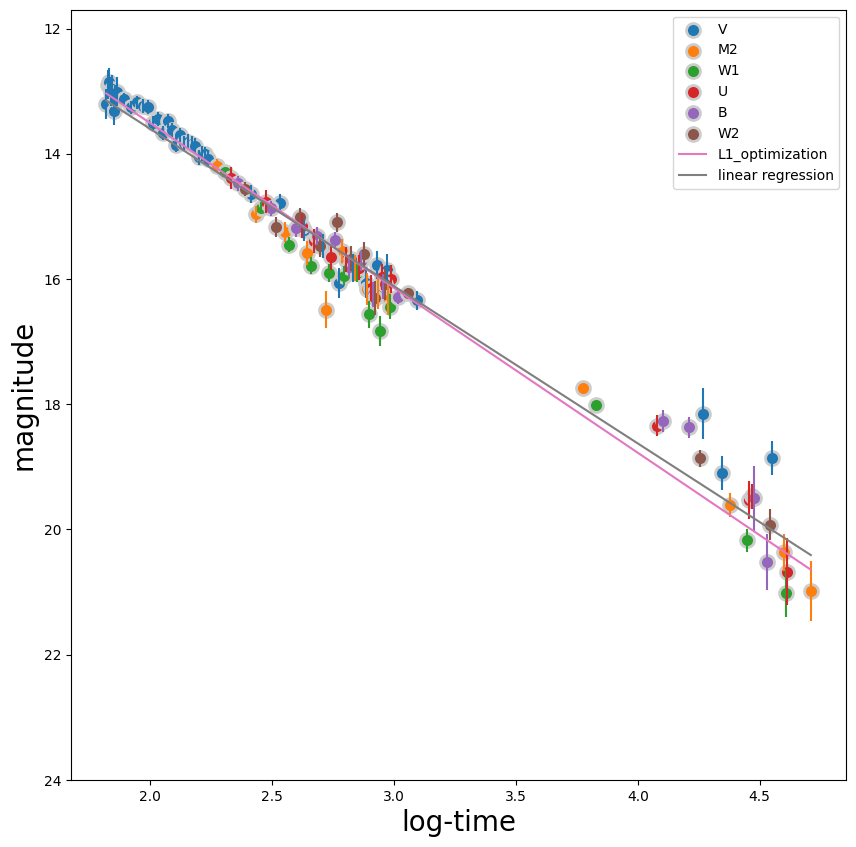

In [60]:
#create a figure container and an axis object inside of it
ax = pl.figure(figsize=(10,10)).add_subplot(111)

#loop on every filter to plot - this will give differnt colors naturally.
#Use pl.errorbar to plot the uncertainties

for f in grbAG["filter"].unique():
    pl.errorbar(grbAG.loc[grbAG["filter"] == f, "logtime"],
                grbAG.loc[grbAG["filter"] == f, "mag"],
                yerr=grbAG.loc[grbAG["filter"] == f, "magerr"],
                fmt='.', ms=0,
                fcolor=None, label=None)

# replot to add a better marker (optional)
for f in grbAG["filter"].unique():
    pl.scatter(grbAG.loc[grbAG["filter"] == f, "logtime"],
               grbAG.loc[grbAG["filter"] == f, "mag"],
               alpha=1, s=100, linewidth=2,
               label=f,
               edgecolor='#cccccc')


# plot the upperlimits as arrows
nuplim = grbAG.mag.isna().sum()
for i in grbAG[grbAG.upperlimit == 1].index:
    pl.arrow(grbAG.loc[i].time,
             grbAG.loc[i].magerr, 0, 2,
            head_width=0.05, head_length=0.1, ec='k')

# I am going to invert the y axis because the "magnitude" measurement is an inverse scale: brighter is smaller

pl.plot(x,line(par.x[0], par.x[1], x), label = "L1_optimization")

pl.plot(x, line(2.512000, 8.58, x), label = "linear regression")
#Always rememebr you axis labels!!
pl.ylabel("magnitude", fontsize=20)
pl.xlabel("log-time", fontsize=20)
# pl.xscale('log')
pl.ylim(24,11.7)
pl.legend()


